# Import Pre-processed data and perform modelling
Import key libraries
Import Cleaned train and test data

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
# Separate features and target
X_train = train.drop('is_fraud', axis=1)
y_train = train['is_fraud']
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']


# Model 1: Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Updated parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],                # Both L1 and L2
    'solver': ['liblinear'],        # Solvers supporting L1
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced', None],
    'max_iter': [100, 250, 500],
    'random_state': [42]
}

lr_model = LogisticRegression()

grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    cv=5,
    scoring='precision',          # Adjust if needed
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best estimator and parameters
lr_best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Predict
y_pred_lr = lr_best_model.predict(X_test)

Best hyperparameters: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}


In [10]:
# Print all hyperparameters set in the model
print("Logistic Regression Parameters:")
print(lr_best_model.get_params())

# Print learned coefficients (weights)
print("\nModel Coefficients:")
print(lr_best_model.coef_)

# Print learned intercept(s)
print("\nModel Intercept:")
print(lr_best_model.intercept_)

Logistic Regression Parameters:
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Model Coefficients:
[[ 1.29084561  0.03065075  0.02697618  0.15222971  1.18705188  0.9826845
   1.36128019 -0.08651646  0.102605    0.61296808 -0.14823042 -0.07696594
   0.77645935 -1.16719669 -1.69973838 -1.19615085  0.96477872  0.
  -0.14961054  0.23083602  0.29150342 -0.21652535 -0.24030611  0.34350596
   0.         -0.17760675  0.07502305  0.18939898]]

Model Intercept:
[-3.67345017]


In [11]:
feature_names = X_train.columns
coefficients = lr_best_model.coef_[0]  #  is used for binary classification; use axis as appropriate for multiclass

# Create a mapping of feature names to coefficients
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
print(coef_df)

# Sort by 'Coefficient' in descending order
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df_sorted)

amt: 1.2908456114491158
age: 0.030650746140287406
distance_km: 0.026976182814322753
category_food_dining: 0.15222971341453578
category_gas_transport: 1.1870518828494514
category_grocery_net: 0.982684498001463
category_grocery_pos: 1.361280190117476
category_health_fitness: -0.08651646292710803
category_home: 0.10260499749845019
category_kids_pets: 0.6129680760003647
category_misc_net: -0.14823042398698424
category_misc_pos: -0.07696594396412436
category_personal_care: 0.7764593467953823
category_shopping_net: -1.1671966900111508
category_shopping_pos: -1.6997383837041935
category_travel: -1.1961508514071983
state_bin_Top 3: 0.9647787151421872
Month_name_Aug: 0.0
Month_name_Dec: -0.14961054263930798
Month_name_Feb: 0.2308360249904319
Month_name_Jan: 0.29150342438164645
Month_name_Jul: -0.21652535227882042
Month_name_Jun: -0.2403061111840033
Month_name_Mar: 0.3435059575298309
Month_name_May: 0.0
Month_name_Nov: -0.17760675131592682
Month_name_Oct: 0.07502305004597226
Month_name_Sep: 0.18

Accuracy        : 0.9431
Precision       : 0.9184466019417475
Recall          : 0.473
Confusion Matrix:
 [[8958   42]
 [ 527  473]]


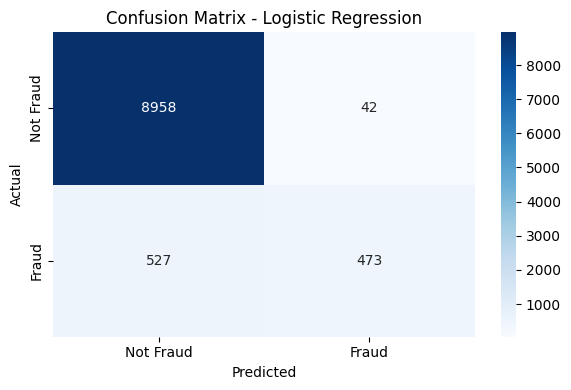

In [12]:
# Metrics
print("Accuracy        :", accuracy_score(y_test, y_pred_lr))
print("Precision       :", precision_score(y_test, y_pred_lr, zero_division=0))
print("Recall          :", recall_score(y_test, y_pred_lr))

# Confusion matrix
conf_mt = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_mt)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mt, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import f1_score
f1_lr = f1_score(y_test, y_pred_lr)
print("F1 Score:", f1_lr)

F1 Score: 0.6244224422442244


# Model 1 Evaluation
Accuracy (98.94%): The model gets almost all predictions correct. However, due to likely class imbalance (many more negatives than positives), this high value can be misleading.
Precision (21.58%): Of all the cases the model predicts as positive, only about 22% are actually positive. While better than random, this means most positive predictions are still false positives.
Recall (65.97%): The model successfully identifies about 66% of true positives, catching a majority, but still missing one third.

True Negatives (TN): 548,431 — Correctly identified negatives.
False Positives (FP): 5,143 — Incorrectly flagged as positive (false alarms).
False Negatives (FN): 730 — Actual positives missed by the model.
True Positives (TP): 1,415 — Correctly identified positives.

An F1 Score of 0.325 indicates modest model performance, showing a balance between precision and recall, but with significant room for improvement.

# Model 2: Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# 5-fold cross-validation with grid search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='precision',  # or choose another metric appropriate for your task
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best model
dt_model = grid_search.best_estimator_

# Predict on test data using the best model
y_pred_dt = dt_model.predict(X_test)

# Best parameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


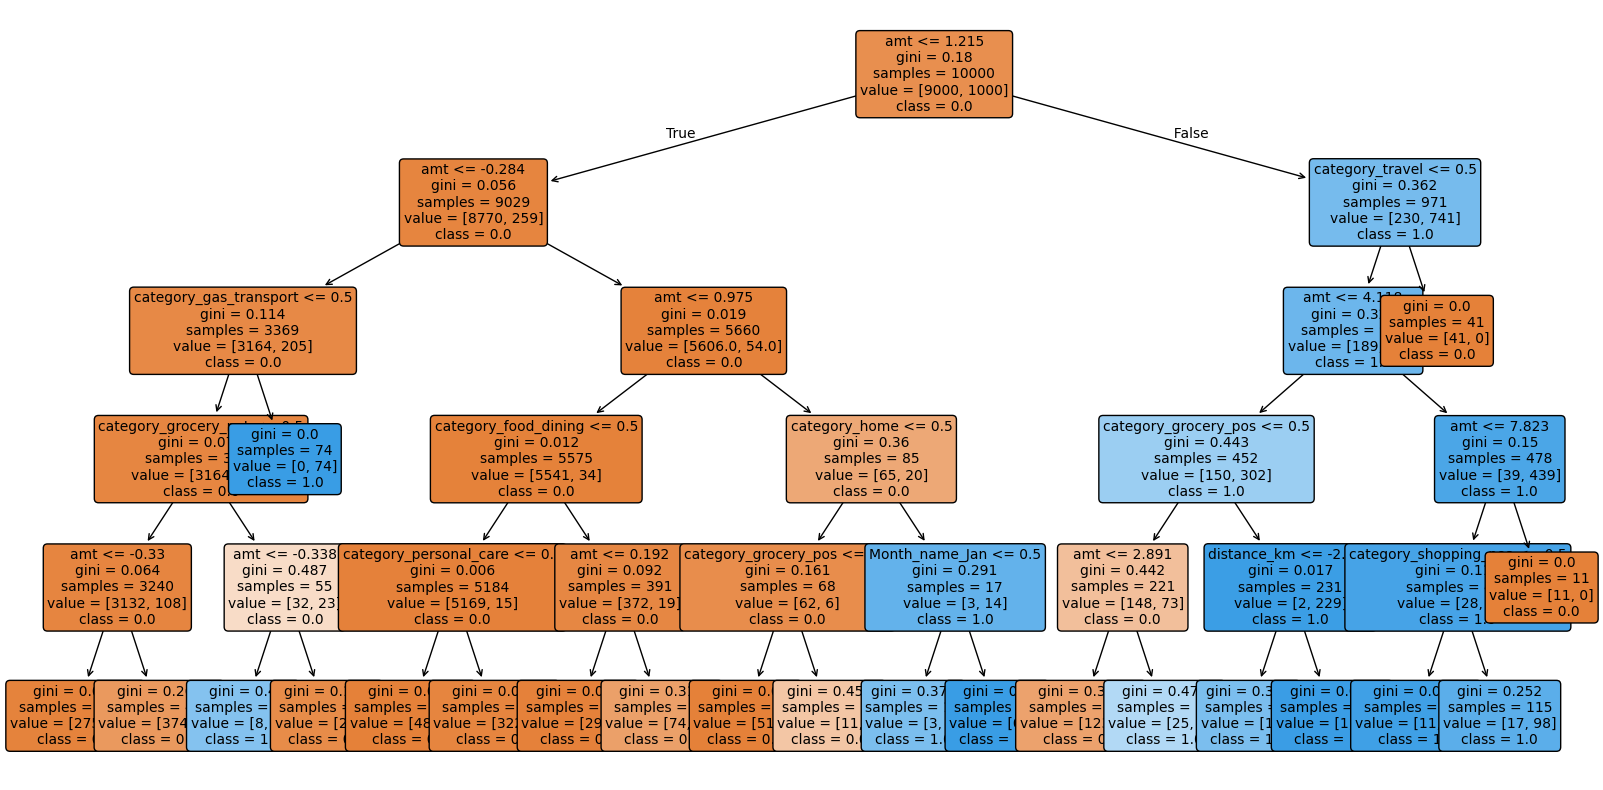

In [15]:
from sklearn import tree

plt.figure(figsize=(20, 10))  # You can adjust the size as needed

# If you have feature names and class names available:
tree.plot_tree(dt_model,
               feature_names=X_train.columns,   # or list if using numpy arrays
               class_names=[str(cls) for cls in dt_model.classes_],
               filled=True,
               rounded=True,
               fontsize=10)
plt.show()

Accuracy        : 0.9732
Precision       : 0.933649289099526
Recall          : 0.788
Confusion Matrix:
 [[8944   56]
 [ 212  788]]


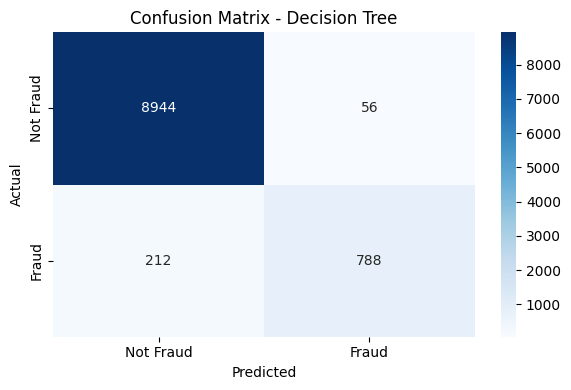

In [16]:
# 3. Calculate and print metrics
print("Accuracy        :", accuracy_score(y_test, y_pred_dt))
print("Precision       :", precision_score(y_test, y_pred_dt, zero_division=0))
print("Recall          :", recall_score(y_test, y_pred_dt))

# 4. Confusion matrix
conf_mt_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_mt_dt)

# 5. Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mt_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

In [17]:
f1_dt = f1_score(y_test, y_pred_dt)
print("F1 Score:", f1_dt)

F1 Score: 0.8546637744034707


# Model 2 Evaluation
Accuracy (99.57%): Overall, nearly every prediction is correct. Given your dataset is likely imbalanced (many more negatives than positives), accuracy can be misleading—but here, both error types are reasonably low.
Precision (46.6%): About 47% of predicted positives are actually true positives. This is a significant improvement; nearly half of your positive predictions are correct.
Recall (77.2%): The model catches about 77% of all actual positive cases. This is a strong recall, meaning relatively few true positives are being missed.

An F1 Score of 0.581 indicates your model demonstrates a solid balance between precision and recall, reflecting meaningful improvement over Logistic regression

# ROC-AUC Curve Evaluation

In [18]:
# For Logistic Regression
y_proba_lr = lr_best_model.predict_proba(X_test)[:, 1]

# For Decision Tree
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

In [19]:
# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

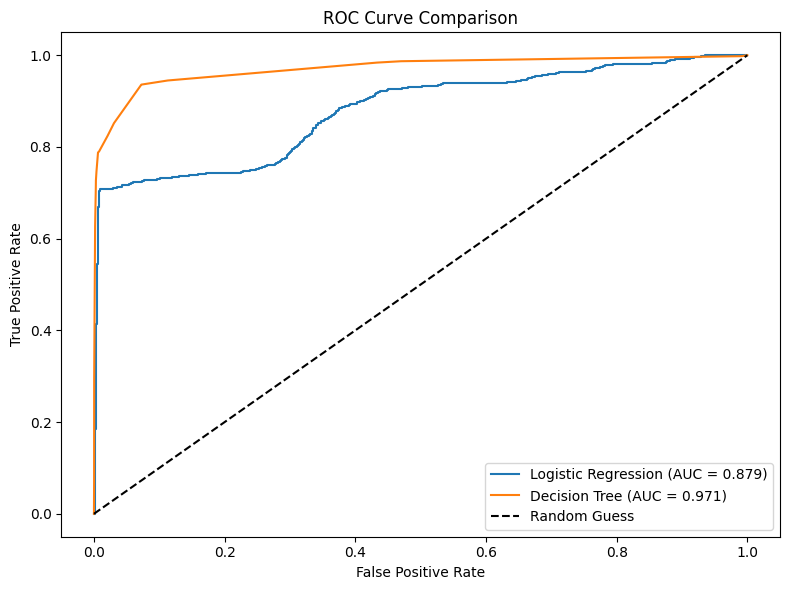

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# Model Selection
Comparing both models, the Decision Tree significantly outperforms Logistic Regression across all relevant metrics: it achieves higher precision (0.47 vs 0.22), higher recall (0.77 vs 0.66), and a substantially better F1 score (0.58 vs 0.33), with a lower false positive rate and higher overall accuracy. This means the Decision Tree is both more effective at correctly identifying positives and more reliable when it predicts a positive, making it the clear choice for your classification task based on these results.

ROC-AUD also shows the Decision Tree Model is superior.


# Model 3: Random Forrest
Using Ensemble method to further improve prediction

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20],          # Number of trees
    'max_depth': [5, 10, 15],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5],       # Minimum samples at a leaf node
    'criterion': ['entropy']     # Splitting criteria
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up 5-fold cross-validated grid search, optimizing for precision
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid,
                              cv=5,
                              scoring='precision',  # Use 'precision_macro' for multiclass
                              n_jobs=-1)

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Get the best model
rf_best_model = grid_search_rf.best_estimator_

# Predict on test data
y_pred_rf = rf_best_model.predict(X_test)

# Best hyperparameters found
print("Best Random Forest hyperparameters:", grid_search_rf.best_params_)

Best Random Forest hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


Accuracy        : 0.9103
Precision       : 0.9478260869565217
Recall          : 0.109
Confusion Matrix:
 [[8994    6]
 [ 891  109]]


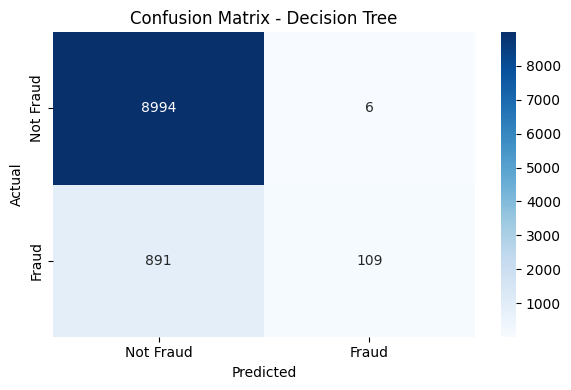

In [23]:
# Calculate and print metrics
print("Accuracy        :", accuracy_score(y_test, y_pred_rf))
print("Precision       :", precision_score(y_test, y_pred_rf, zero_division=0))
print("Recall          :", recall_score(y_test, y_pred_rf))

# 4. Confusion matrix
conf_mt_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_mt_rf)

# 5. Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mt_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

In [24]:
# For Decision Tree
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Model 4 Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [10, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.7, 1.0],
    'max_features': [None, 'sqrt']
}

# The classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Precision scorer
precision_scorer = make_scorer(precision_score, average='binary')

# Grid search
grid_search = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    scoring=precision_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation precision: ", grid_search.best_score_)

# Predict on test data
y_pred_Gb = grid_search.best_estimator_.predict(X_test)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 20, 'subsample': 0.7}
Best cross-validation precision:  0.9800000000000001


Accuracy        : 0.9001
Precision       : 1.0
Recall          : 0.001
Confusion Matrix:
 [[9000    0]
 [ 999    1]]


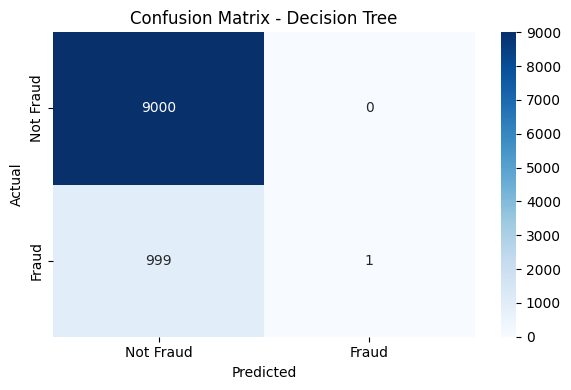

In [26]:
# Calculate and print metrics
print("Accuracy        :", accuracy_score(y_test, y_pred_Gb))
print("Precision       :", precision_score(y_test, y_pred_Gb, zero_division=0))
print("Recall          :", recall_score(y_test, y_pred_Gb))

# 4. Confusion matrix
conf_mt_Gb = confusion_matrix(y_test, y_pred_Gb)
print("Confusion Matrix:\n", conf_mt_Gb)

# 5. Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mt_Gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [10, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.7, 1.0],
    'max_features': [None, 'sqrt']
}

# The classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# F1 scorer (for binary classification)
f1_scorer = make_scorer(f1_score, average='binary')

# Grid search
grid_search = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    scoring=f1_scorer,   # <-- key change here
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation F1 score: ", grid_search.best_score_)

# Predict on test data
y_pred_Gb_f1 = grid_search.best_estimator_.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'max_features': None, 'n_estimators': 20, 'subsample': 1.0}
Best cross-validation F1 score:  0.8718335245575795


Accuracy        : 0.976
Precision       : 0.9502369668246445
Recall          : 0.802
F1 Score        : 0.8698481561822126
Confusion Matrix:
 [[8958   42]
 [ 198  802]]


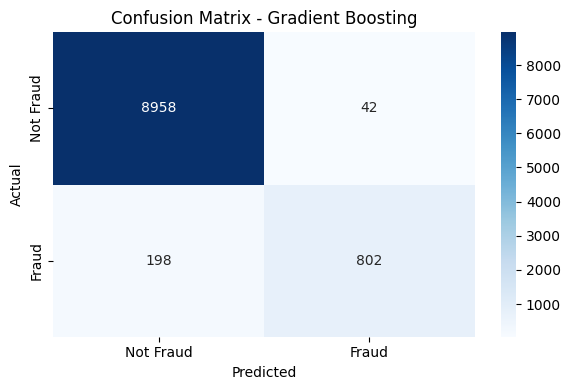

In [28]:
# 1. Calculate and print metrics
print("Accuracy        :", accuracy_score(y_test, y_pred_Gb_f1))
print("Precision       :", precision_score(y_test, y_pred_Gb_f1, zero_division=0))
print("Recall          :", recall_score(y_test, y_pred_Gb_f1))
print("F1 Score        :", f1_score(y_test, y_pred_Gb_f1))

# 2. Confusion matrix
conf_mt_Gb_f1 = confusion_matrix(y_test, y_pred_Gb_f1)
print("Confusion Matrix:\n", conf_mt_Gb_f1)

# 3. Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mt_Gb_f1, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.tight_layout()
plt.show()

When dealing with a highly imbalanced dataset like credit card fraud, relying on a single metric like accuracy is a common mistake.

* The Logistic Regression model had a high accuracy (94.31%), but its **recall** was very low (47.3%), meaning it missed more than half of the fraudulent transactions.
* **Gradient Boosting** is a better choice because it is designed to specifically improve performance on these missed cases, leading to a much higher recall.

In short, while accuracy might look good on paper, **recall is the most important metric** for catching fraud, and Gradient Boosting is the better tool for the job.

In [ ]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier

# Create and train your GradientBoostingClassifier model  
best_gb_model = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.2,
    max_depth=5,
    subsample=0.7,
    max_features='sqrt',
    random_state=42
)

# Assuming you have trained the model here
best_gb_model.fit(X_train, y_train)

# Save the model to a .pkl file with protocol version 5
try:
    with open('credit_card_fraud_2.pkl', 'wb') as file:
        pickle.dump(best_gb_model, file, protocol=5)
    print('Model saved as credit_card_fraud.pkl')
except Exception as e:
    print(f"Error saving the model: {str(e)}")

Model saved as credit_card_fraud.pkl
